# Programming Language Classifier

In [4]:
import os
import re
import csv
import operator
import numpy as np
import pandas as pd
from os import listdir
from collections import *
from os.path import isfile, join

%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
train_data = np.array(np.load("../data/githubtrainingdatacompressed.npz")['arr_0'])
test_data = np.array(np.load("../data/githubtestdatacompressed.npz")['arr_0'])

In [6]:
with open('test.py', 'wb') as file:
    file.write(train_data[0][0])

(array([145.,  60., 327.,   0., 128., 322.,   0., 379., 402.,  77.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

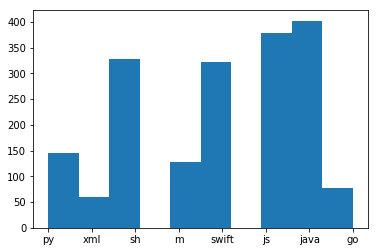

In [7]:
plt.hist(train_data[:, 1])

In [8]:
pls = {}
for row in range(len(train_data)):
    if train_data[row][1].decode() not in pls:
        pls[train_data[row][1].decode()] = []
    pls[train_data[row][1].decode()].append(train_data[row][0].decode())

In [14]:
d = []
chunk = 2048

for i in train_data:
        for j in range(0,len(i[0]),chunk):
            text = re.sub(' +',' '," ".join(re.split(r'[^\w]', re.sub(re.compile("/\*.*?\*/",re.DOTALL ) ,"" ,i[0][j:j+chunk].decode('utf-8')))))
            text = text.lower()
            
            d.append({'text': text, 'pl': i[1].decode()})

df = pd.DataFrame(d, columns = ['text', 'pl'])
df['text'].replace(' ', np.nan, inplace=True)
df = df.dropna()
# df.to_csv('trainingdata.csv', header=['text','pl'],index=False)

In [16]:
df.iloc[0]['text']

' copyright 2016 ibm corp licensed under the apache license version 2 0 the license you may not use this file except in compliance with the license you may obtain a copy of the license at http www apache org licenses license 2 0 unless required by applicable law or agreed to in writing software distributed under the license is distributed on an as is basis without warranties or conditions of any kind either express or implied see the license for the specific language governing permissions and limitations under the license ibm xcli client events module module client description enables sending a notification event to the spectrum accelerate storage arrays import json from socket import getfqdn from bunch import bunch from logging import getlogger from pyxcli import xcli_default_logger from pyxcli events platform_info import get_platform_details from pyxcli errors import unrecognizedcommanderror from pyxcli errors import operationforbiddenforusercategoryerror log getlogger xcli_default_l

<BarContainer object of 8 artists>

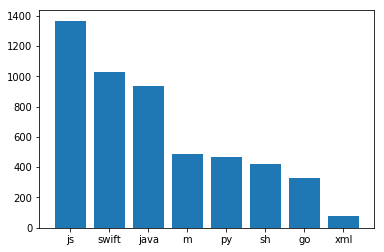

In [17]:
plt.bar(df['pl'].value_counts().index, df['pl'].value_counts().values)

In [18]:
from collections import Counter

vocab = Counter()
for document in df['text']:
    tokens = document.split()
    vocab.update(tokens)

In [23]:
print(len(vocab))
print(vocab.most_common(100))

24501
[('this', 12519), ('if', 12088), ('return', 11515), ('self', 10029), ('a', 9757), ('the', 9369), ('0', 8904), ('function', 8502), ('var', 8297), ('string', 8228), ('e', 7528), ('import', 5757), ('error', 5556), ('t', 5527), ('to', 5467), ('n', 5394), ('final', 5168), ('1', 4785), ('s', 4775), ('for', 4535), ('b', 4384), ('i', 4303), ('let', 4214), ('err', 3987), ('public', 3786), ('in', 3628), ('c', 3621), ('is', 3602), ('else', 3486), ('null', 3347), ('r', 3205), ('data', 3152), ('get', 3150), ('com', 3144), ('name', 3139), ('nil', 3076), ('response', 3064), ('func', 2976), ('d', 2823), ('new', 2769), ('void', 2666), ('request', 2620), ('2', 2531), ('url', 2516), ('class', 2512), ('of', 2464), ('fake', 2407), ('x', 2323), ('json', 2252), ('length', 2169), ('ibm', 2113), ('id', 2098), ('type', 2080), ('h', 2037), ('logger', 2015), ('and', 1989), ('test', 1984), ('f', 1981), ('o', 1902), ('log', 1890), ('echo', 1888), ('true', 1877), ('not', 1873), ('body', 1863), ('int', 1852), (

In [54]:
min_occurane = 5
tokens = [k for k,c in vocab.items() if c >= min_occurane]
forbidden = ['copyright', 'ibm', 'corp', 'licensed', 'you', 'apache', 'license', 'licenses', 'org', 'compliance']
tokens = [word for word in tokens if len(word) > 1]
tokens = [word for word in tokens if word not in forbidden]
tokens = [word for word in tokens if not word.isnumeric()]
print(len(tokens))

11100


In [55]:
# save list to file
def save_list(lines, filename):
    # convert lines to a single blob of text
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

save_list(tokens, 'vocab.txt')

In [56]:
tokens[:20]

['under',
 'the',
 'version',
 'may',
 'not',
 'use',
 'this',
 'file',
 'except',
 'in',
 'with',
 'obtain',
 'copy',
 'of',
 'at',
 'http',
 'www',
 'unless',
 'required',
 'by']

In [57]:
def clean_text(text):
    
    doc_tokens = text.split(' ')
    doc_tokens = [w for w in doc_tokens if w in tokens]
    doc_tokens = ' '.join(doc_tokens)
    
    return doc_tokens
    
new_text = []
for text in df['text']:
    new_text.append(clean_text(text))

In [58]:
df['text'] = np.array(new_text)

In [59]:
df

,text,pl
0,under the version the may not use this file ex...,py
1,params if not self product_name raise valueerr...,py
2,platform self platform action action propertie...,py
3,xml version encoding utf project xmlns http ma...,xml
4,bin bash if ne then echo usage id exit fi cat_...,sh
5,import sdwebimagemanager import objc message i...,m
6,key bool nsurl url nsstring key self cachekeyf...,m
7,prefetchurls instead very common is to send th...,m
8,but sdwebimagerefreshcached is provided notify...,m
9,do nothing if the operation was cancelled see ...,m


In [60]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['text'])

Using TensorFlow backend.
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1

In [61]:
encoded_docs = tokenizer.texts_to_sequences(df['text'])

In [62]:
from keras.preprocessing.sequence import pad_sequences

max_length = max([len(s.split()) for s in df['text']])
X = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

In [63]:
max_length

283

In [64]:
X[69]

array([ 161,   26,   43,  110,   35,   38,    9,   50,  564, 1249,  185,
          9,   50,  564,  783,   20,    9,   50,  651,  651,  169,    9,
         50,  651,  651,  380,    9,   50,  651,  651,  155,    9,   89,
        343,  460,    9,   89,  110,  680,  398,    9,  321,  391,    9,
        321,   31,    9,   26,  124,  308,  265, 1972,    9,   26,  124,
        308,  265, 1973,   19,   36,   57, 6539, 1310,  391,   19,   33,
        391,    1, 1310,   30, 6539,   31,   19,   33,  203,  219,  460,
         12, 1973, 2110,  169, 1973,   36,    1, 1310,  203, 2110,  398,
        735,  380, 2110,   52,  735,   31,   19,   33,  270,  219,  460,
         12, 1972, 2148,  169, 1972,   36,  155, 2148, 4912,  752,  185,
          1, 1310,  270, 2148,   20,  398,  735,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [65]:
vocab_size = len(tokenizer.word_index) + 1

In [66]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Flatten, Dense, Dropout, ReLU

model = Sequential()

model.add(Embedding(vocab_size, 100, input_length=max_length))

model.add(Conv1D(filters=16, kernel_size=8, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())

model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(ReLU())

model.add(Dense(8, activation='softmax'))

model.summary()






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 283, 100)          987500    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 276, 16)           12816     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 138, 16)           0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2208)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                70688     
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
______________________

In [67]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [68]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(X, df['pl'], test_size = 0.2, random_state = 42)

<BarContainer object of 8 artists>

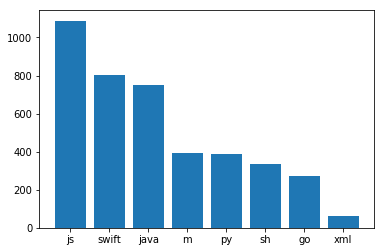

In [69]:
plt.bar(yTrain.value_counts().index, yTrain.value_counts().values)

<BarContainer object of 8 artists>

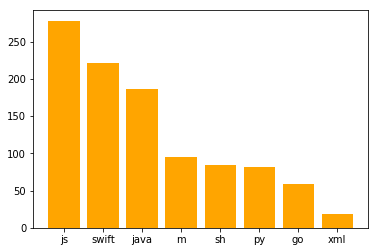

In [70]:
plt.bar(yTest.value_counts().index, yTest.value_counts().values, color='orange')

In [71]:
yTrain = pd.get_dummies(yTrain)

In [72]:
yTest = pd.get_dummies(yTest)

In [110]:
y_test = []

for i in yTest:
    y_test.append(i.argmax())

In [113]:
from keras.utils.np_utils import to_categorical

categorical_labels = to_categorical(y_train, num_classes=None)

In [114]:
categorical_labels

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [73]:
history = model.fit(xTrain, yTrain, batch_size=64, epochs=10, validation_data=(xTest, yTest))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 4088 samples, validate on 1023 samples
Epoch 1/10
4088/4088 [==============================] - 8s 2ms/step - loss: 1.6917 - acc: 0.3491 - val_loss: 0.9652 - val_acc: 0.6657
Epoch 2/10
4088/4088 [==============================] - 5s 1ms/step - loss: 0.7558 - acc: 0.7060 - val_loss: 0.3374 - val_acc: 0.8876
Epoch 3/10
4088/4088 [==============================] - 5s 1ms/step - loss: 0.3615 - acc: 0.8635 - val_loss: 0.1502 - val_acc: 0.9550
Epoch 4/10
4088/4088 [==============================] - 5s 1ms/step - loss: 0.2318 - acc: 0.9151 - val_loss: 0.1063 - val_acc: 0.9658
Epoch 5/10
4088/4088 [==============================] - 5s 1ms/step - loss: 0.1758 - acc: 0.9337 - val_loss: 0.0819 - val_acc: 0.9814
Epoch 6/10
4088/4088 [==============================] - 5s 1ms/step - loss: 0.1387 - acc: 0.9467 - val_loss: 0.0663 - val_acc: 0.9853
Epoch 7/10
4088/4088 [==============================] 

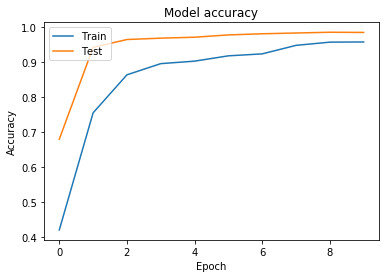

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

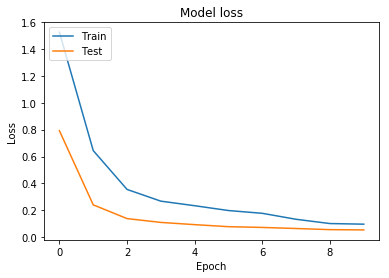

In [34]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def prepare_text(text):
    
    text = re.sub(' +',' '," ".join(re.split(r'[^\w]', re.sub(re.compile("/\*.*?\*/",re.DOTALL ) ,"" ,i[0][j:j+chunk].decode('utf-8')))))   
    d.append({'text': text, 'pl': i[1].decode()})

In [75]:
def clean_text(text):
    
    doc_tokens = text.split(' ')
    doc_tokens = [w for w in doc_tokens if w in tokens]
    doc_tokens = ' '.join(doc_tokens)
    
    return doc_tokens

In [85]:
def test_on_directory(path):
    
    texts = []
    file_names = os.listdir(path)
    
    for file_name in file_names:
        with open('./test/' + file_name, 'r', encoding='utf-8') as file:
            text = file.read()[:1024]
            
        text = re.sub(' +',' '," ".join(re.split(r'[^\w]', re.sub(re.compile("/\*.*?\*/",re.DOTALL ) ,"" , text))))  
        text = text.lower()
        text = clean_text(text)
        texts.append(text)
        
    encoded_docs = tokenizer.texts_to_sequences(texts)
    X = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
    
    return file_names, X, texts

# Testing Model

In [148]:
from time import time

start = time()

filenames, test_df, texts = test_on_directory('./test')
preds = model.predict(test_df)
predicted_class_indices = np.argmax(preds, axis=1)
for filename, i in zip(filenames, predicted_class_indices):
    print(filename, y[i], sep=': ')
    
print('Time Taken:  ', time() - start)

array_literal_local_array.swift: swift
authentication.py: py
bridging.swift: swift
category_handler.py: py
compressed.js: js
ErrorBridging.swift: swift
error_handler.py: py
index.js: js
main.js: js
makeTapReport.m: js
Messentrypage.js: js
modernizr-2.6.2.min.js: js
Notifications.js: js
runMatlab2TikzTests.m: py
switcher.js: js
test.go: go
tests.sh: sh
user_manager.py: py
Time Taken:   0.21937990188598633


## Time Taken:   0.21937990188598633
## Accuracy: 0.9844
## less incorrect prediction. Would definitely improve with more data and features

# Testing Pygments

In [151]:
from pygments.lexers import guess_lexer
import os

start = time()

file_names = os.listdir('./test')

for file_name in file_names:
    with open('./test/' + file_name, encoding='utf-8') as file:
        lexer_subclass = guess_lexer(file.read())
        print(file_name, lexer_subclass.name, sep=' : ')
        
print('Time Taken:  ', time() - start)

array_literal_local_array.swift : Text only
authentication.py : Python
bridging.swift : Python
category_handler.py : Python
compressed.js : Prolog
ErrorBridging.swift : Python
error_handler.py : Python
index.js : TypeScript
main.js : TypeScript
makeTapReport.m : TypeScript
Messentrypage.js : Python
modernizr-2.6.2.min.js : Objective-C
Notifications.js : Python
runMatlab2TikzTests.m : TypeScript
switcher.js : XML
test.go : Python
tests.sh : Bash
user_manager.py : Python
Time Taken:   0.6303155422210693


## Time Taken:   0.29717063903808594

# XGBoost 

In [91]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()
vectorizer.fit(df['text'])

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [95]:
transformed = vectorizer.transform(df['text'])

In [97]:
transformed.shape

(5111, 11100)

In [98]:
def clean_text(text):
    
    text = re.sub(' +',' '," ".join(re.split(r'[^\w]', re.sub(re.compile("/\*.*?\*/",re.DOTALL ) ,"" , text))))
    text = text.lower()
    doc_tokens = text.split(' ')
    doc_tokens = [w for w in doc_tokens if w in tokens]
    doc_tokens = ' '.join(doc_tokens)
    
    return doc_tokens

In [100]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import BaseEstimator

class Text2TfIdfTransformer(BaseEstimator):

    def __init__(self):
        self._model = TfidfVectorizer()
        pass

    def fit(self, df_x, df_y=None):
        df_x = df_x.apply(lambda x : clean_text(x))
        self._model.fit(df_x)
        return self

    def transform(self, df_x):
        return self._model.transform(df_x)

In [101]:
tfidf_transformer = Text2TfIdfTransformer()
tfidf_vectors = tfidf_transformer.fit(df['text']).transform(df['text'])

In [102]:
tfidf_vectors.shape

(5111, 11100)

In [105]:
from sklearn.pipeline import Pipeline
import xgboost as xgb


pl_xgb_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                         ('xgboost', xgb.XGBClassifier(objective='multi:softmax'))])

In [106]:
from sklearn.model_selection import train_test_split

xTrain, xTest, yTrain, yTest = train_test_split(df['text'], df['pl'], test_size = 0.2, random_state = 42)

In [108]:
pl_xgb_tf_idf.fit(xTrain, yTrain)

Pipeline(memory=None,
     steps=[('tfidf', Text2TfIdfTransformer()), ('xgboost', XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1))])

In [122]:
preds = pl_xgb_tf_idf.predict(xTest)

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [123]:
from sklearn.metrics import accuracy_score
score = accuracy_score(yTest, preds)
score

0.9775171065493646

## Testing XGBoost 

In [159]:
def test_on_directory_for_xg(path):
    
    texts = []
    file_names = os.listdir(path)
    
    for file_name in file_names:
        with open('./test/' + file_name, 'r', encoding='utf-8') as file:
            text = file.read()[:2048]
    
        text = clean_text(text)
        texts.append(text)
    
    return file_names, texts

In [150]:
from time import time

start = time()

filenames, texts = test_on_directory_for_xg('./test')
preds = pl_xgb_tf_idf.predict(texts)

for filename, i in zip(filenames, preds):
    print(filename, i, sep=': ')
    
print('Time Taken:  ', time() - start)

array_literal_local_array.swift: go
authentication.py: py
bridging.swift: swift
category_handler.py: py
compressed.js: js
ErrorBridging.swift: swift
error_handler.py: py
index.js: js
main.js: js
makeTapReport.m: js
Messentrypage.js: js
modernizr-2.6.2.min.js: js
Notifications.js: js
runMatlab2TikzTests.m: js
switcher.js: js
test.go: go
tests.sh: sh
user_manager.py: py
Time Taken:   0.20940804481506348


c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


## Time Taken:  0.20940804481506348
## Accuray: 0.9775171065493646

# Random Forest

In [152]:
from sklearn.ensemble import RandomForestClassifier

pl_random_forest_tf_idf = Pipeline(steps=[('tfidf',Text2TfIdfTransformer()),
                                   ('random_forest', RandomForestClassifier())])

c:\users\asus\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [153]:
pl_random_forest_tf_idf.fit(xTrain, yTrain)

Pipeline(memory=None,
     steps=[('tfidf', Text2TfIdfTransformer()), ('random_forest', RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [154]:
preds = pl_random_forest_tf_idf.predict(xTest)

In [155]:
from sklearn.metrics import accuracy_score
score = accuracy_score(yTest, preds)
score

0.9863147605083089

## Testing Random Forest

In [161]:
from time import time

start = time()

filenames, texts = test_on_directory_for_xg('./test')
preds = pl_random_forest_tf_idf.predict(texts)

for filename, i in zip(filenames, preds):
    print(filename, i, sep=': ')
    
print('Time Taken:  ', time() - start)

array_literal_local_array.swift: go
authentication.py: py
bridging.swift: swift
category_handler.py: py
compressed.js: js
ErrorBridging.swift: swift
error_handler.py: py
index.js: js
main.js: js
makeTapReport.m: js
Messentrypage.js: js
modernizr-2.6.2.min.js: js
Notifications.js: js
runMatlab2TikzTests.m: js
switcher.js: js
test.go: go
tests.sh: sh
user_manager.py: py
Time Taken:   0.1934823989868164


## Time Taken:   0.1934823989868164
## Accuray: 0.9863147605083089